# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt

# Data Preparation

In [3]:
data_df = pd.read_csv('data.csv', delimiter=',', nrows=None, encoding='unicode_escape')

In [4]:
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data_df = data_df.fillna(-1)

In [7]:
data_df['invoice_date'] = data_df['InvoiceDate'].apply(lambda x: dt.strptime(x, '%m/%d/%Y %H:%M'))

In [8]:
data_df['Quantity'] = data_df['Quantity'].apply(int)
data_df['UnitPrice'] = data_df['UnitPrice'].apply(float)
data_df['CustomerID'] = data_df['CustomerID'].apply(int)

In [9]:
data_df.groupby(
    ['CustomerID']
)['InvoiceNo'].nunique().reset_index().sort_values(
    by='InvoiceNo', ascending=False
).head(10)

,CustomerID,InvoiceNo
0,-1,3710
1896,14911,248
331,12748,224
4043,17841,169
1675,14606,128
2193,15311,118
569,13089,118
488,12971,89
1616,14527,86
804,13408,81


Customer с ID -1 похож на тестового пользователя, так что в расчетах использоваться не будет

In [10]:
data_df = data_df.loc[data_df['CustomerID'] != -1]

In [11]:
data_df.nunique()

InvoiceNo       22190
StockCode        3684
Description      3896
Quantity          436
InvoiceDate     20460
UnitPrice         620
CustomerID       4372
Country            37
invoice_date    20460
dtype: int64

In [19]:
data_df['revenue'] = data_df['Quantity'] * data_df['UnitPrice']

# Динамика по месяцам

In [20]:
data_df['month'] = data_df['invoice_date'].apply(lambda x: x.replace(day=1).date())

In [25]:
sns.set_theme()

In [26]:
month_dynamic = data_df.groupby('month').agg(
    {
        'InvoiceNo': 'nunique', 
        'Quantity': 'sum', 
        'UnitPrice': 'sum', 
        'CustomerID': 'nunique', 
        'revenue': 'sum'
    }
).reset_index()

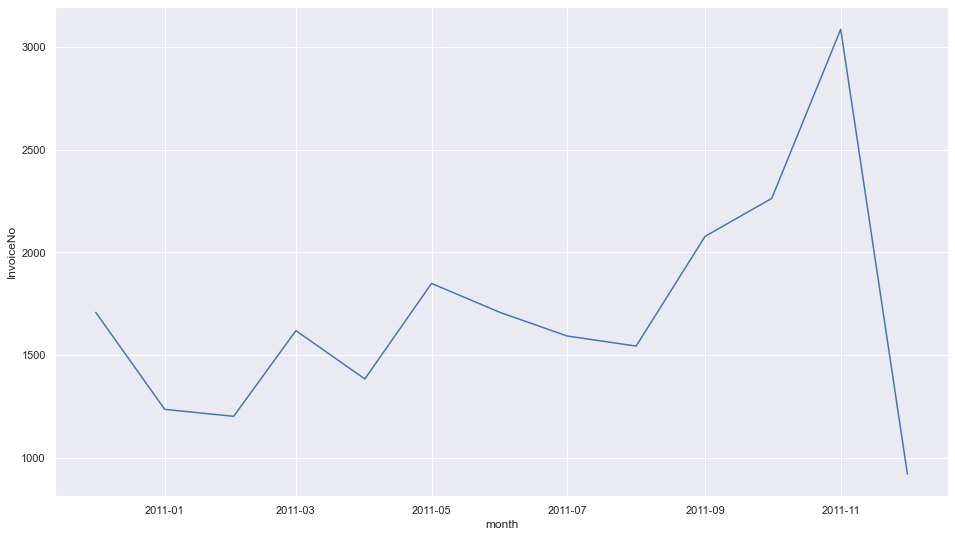

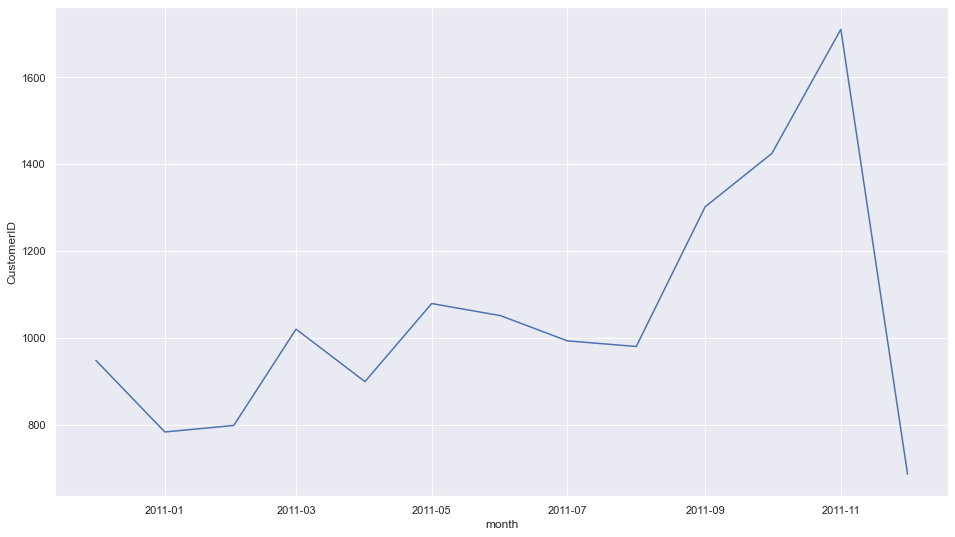

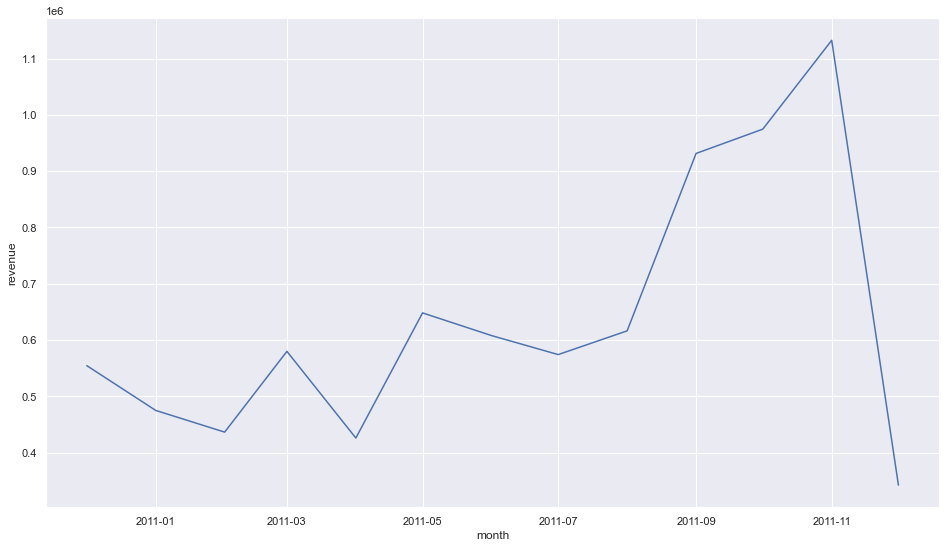

In [27]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=month_dynamic, x='month', y='InvoiceNo')
plt.show()

plt.figure(figsize=(16, 9))
sns.lineplot(data=month_dynamic, x='month', y='CustomerID')
plt.show()

plt.figure(figsize=(16, 9))
sns.lineplot(data=month_dynamic, x='month', y='revenue')
plt.show()

In [28]:
month_dynamic

,month,InvoiceNo,Quantity,UnitPrice,CustomerID,revenue
0,2010-12-01,1708,296362,86057.190,948,554604.020
1,2011-01-01,1236,269379,73202.320,783,475074.380
2,2011-02-01,1202,262833,67529.430,798,436546.150
3,2011-03-01,1619,344012,96183.240,1020,579964.610
4,2011-04-01,1384,278585,91117.721,899,426047.851
5,2011-05-01,1849,367852,125537.660,1079,648251.080
6,2011-06-01,1707,356922,129301.450,1051,608013.160
7,2011-07-01,1593,363418,92754.521,993,574238.481
8,2011-08-01,1544,386612,88126.750,980,616368.000
9,2011-09-01,2078,537496,126029.422,1302,931440.372


In [30]:
month_dynamic['ARPU'] = month_dynamic['revenue']/month_dynamic['CustomerID']

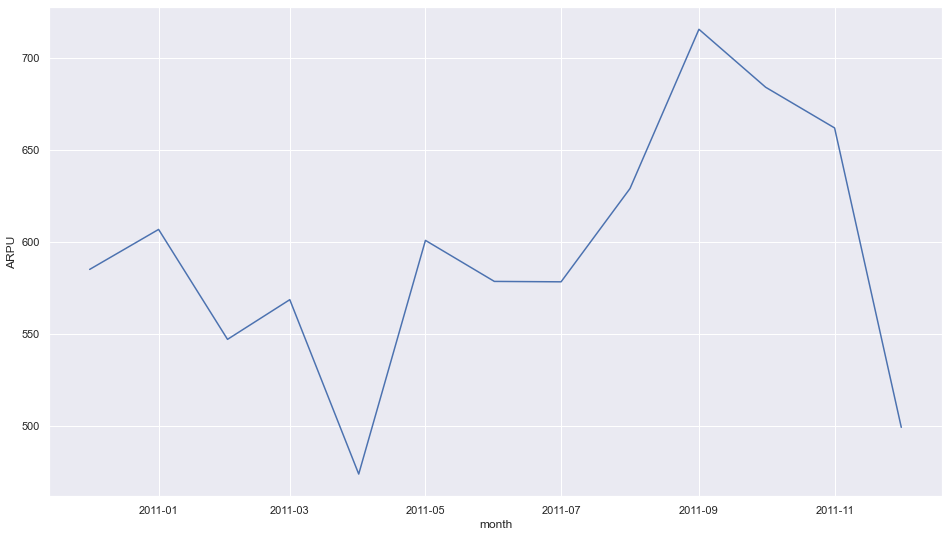

In [32]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=month_dynamic, x='month', y='ARPU')
plt.show()

In [33]:
month_dynamic['AIPU'] = month_dynamic['InvoiceNo']/month_dynamic['CustomerID']

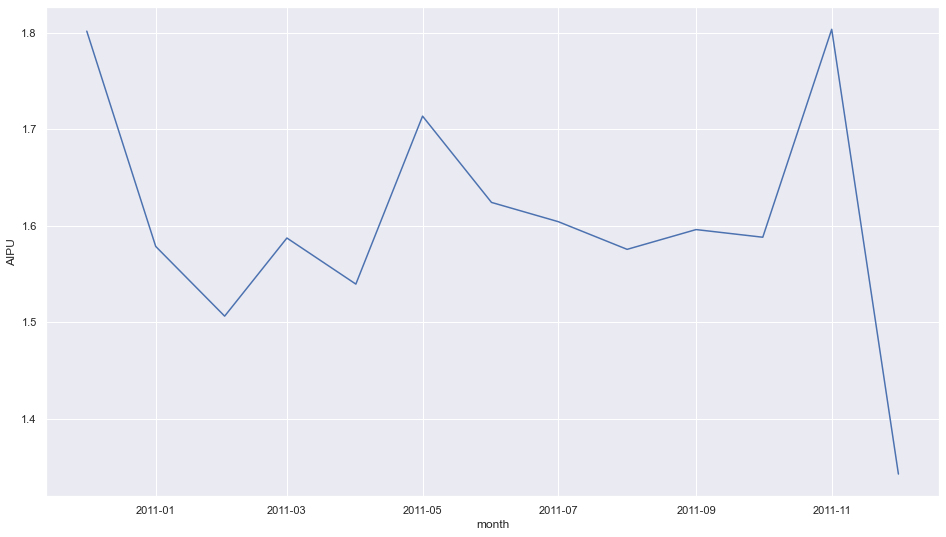

In [34]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=month_dynamic, x='month', y='AIPU')
plt.show()